# 20기 Clustering 정규세션 과제

**데이터:** [Mall Customer Segmentation Data| Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

---

## 0. 데이터 불러오기

In [19]:
import pandas as pd
df = pd.read_csv("Mall_Customers.csv", index_col = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


## 1. Preprocssing / EDA

1-1 데이터 파악

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


결측치가 없기 때문에 따로 결측치를 제거하지 않고 그대로 진행한다.

In [21]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [22]:
# 고유값 확인

unique_cnt = {}

for i in df.columns :
    unique_cnt[i] = df[i].nunique()
    
unique_cnt

{'Gender': 2,
 'Age': 51,
 'Annual Income (k$)': 64,
 'Spending Score (1-100)': 84}

In [23]:
# Gender 타입이 object이기 때문에 이를 수치형으로 변환

df['Gender'].replace({'Male' : 1, 'Female' : 0}, inplace = True)

df['Gender']

CustomerID
1      1
2      1
3      0
4      0
5      0
      ..
196    0
197    0
198    1
199    1
200    1
Name: Gender, Length: 200, dtype: int64

#### 1-2 데이터 시각화

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

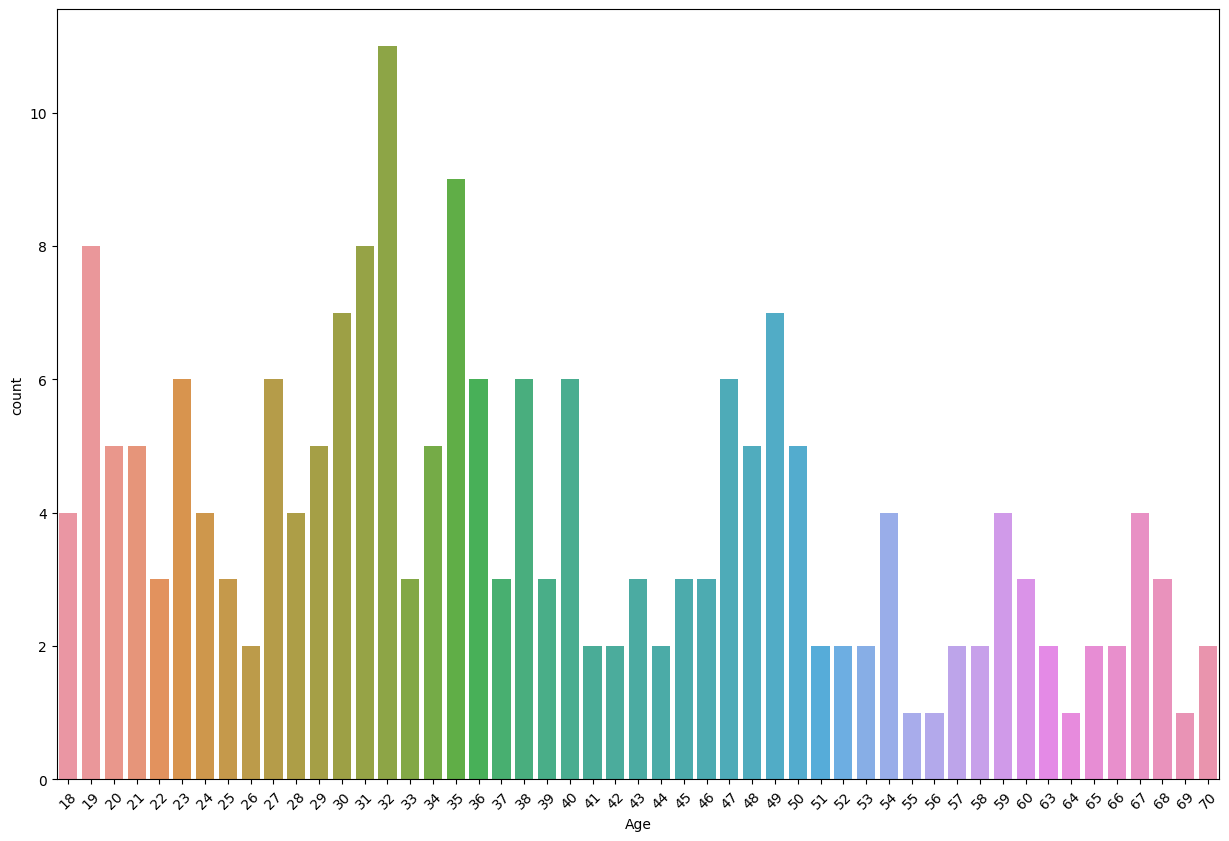

In [25]:
# Age

plt.figure(figsize=(15,10))
sns.countplot(x = "Age", data =df)
plt.xticks(rotation = 45)
plt.show()

연령대가 다양하게 분포되어있지만, 특히 20대부터 30대 중반이 가장 많은 분포를 띤다.

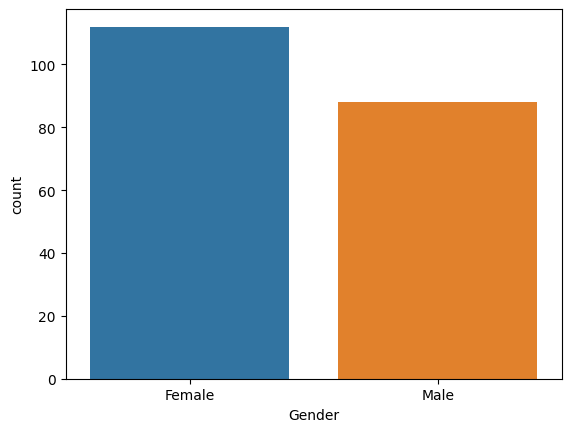

In [26]:
sns.countplot(x = "Gender", data = df)
plt.xticks([0,1], ['Female','Male'])
plt.show()

성별의 경우 남자보다 여자의 비중이 더 많은 것을 확인할 수 있다.

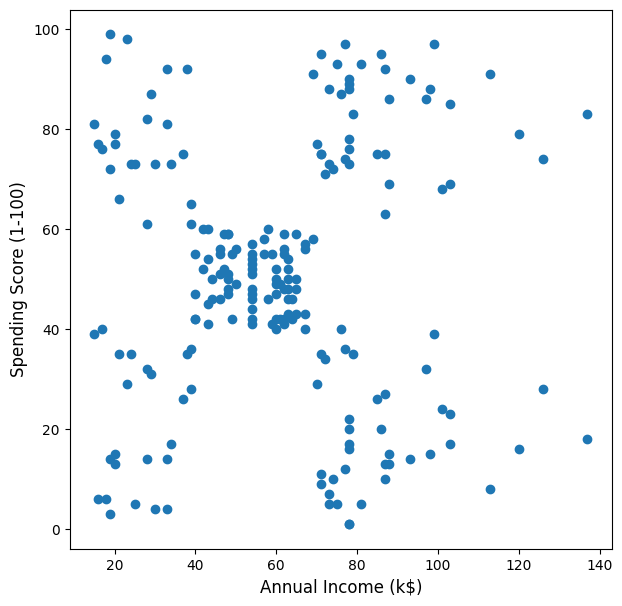

In [27]:
# Annual Income, Spending Score

plt.figure(figsize = (7,7))
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)',fontsize=12)
plt.ylabel('Spending Score (1-100)',fontsize=12)
plt.show()

* `Annual Income`과 `Spending Score`에 대한 산점도를 그려보았다.
* 위 그림을 확인했을 때, 군집이 5개 정도로 나뉘는 것으로 볼 수 있으며, 군집화 하기 용이하다는 것을 확인할 수 있다.

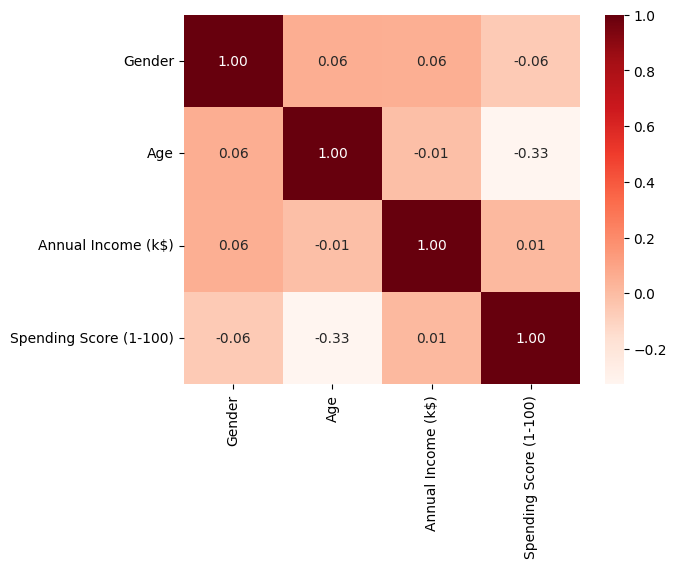

In [28]:
sns.heatmap(df.corr(), annot=True, fmt = '.2f', cmap='Reds')  
plt.show()

* 변수들간의 상관관계를 확인해 보았다.
* 위 그림을 봤을 때, 상관관계가 높은 변수들은 크게 없는 것으로 판단된다.

`따라서 Annual Income과 Spending Score 두 변수들을 중점으로 클러스터링을 진행하고자 한다.`

In [29]:
new_df = df[['Annual Income (k$)', 'Spending Score (1-100)']]

## 2. Clustering

In [30]:
# 먼저 clustering을 진행하기 전 scaling을 진행하고자 한다.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(new_df)

# 스케일링 거쳐서 새로운 형태로 변환하는 작업
new_df = pd.DataFrame(scaler.transform(new_df))

new_df


,0,1
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


## K-Means 알고리즘

* 대표적인 분리형 군집화 알고리즘
* 각 군집의 평균을 활용하여 k 개의 군집을 묶는 것

In [31]:
# 실루엣 계수를 이용하여 최적의 군집 수 지정
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 군집 수 2~10개로 제한
for n_cluster in range(2, 11) :
    kmeans = KMeans(n_clusters= n_cluster)
    kmeans.fit(new_df)
    cluster = kmeans.predict(new_df)
    score = silhouette_score(new_df, cluster)
    
    print(f"군집 수 : {n_cluster}, 실루엣 계수 : {score}")

c:\Users\gjm10\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\gjm10\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\gjm10\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\gjm10\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

군집 수 : 2, 실루엣 계수 : 0.28640637225274423
군집 수 : 3, 실루엣 계수 : 0.46658474419000145
군집 수 : 4, 실루엣 계수 : 0.4939069237513199
군집 수 : 5, 실루엣 계수 : 0.5546571631111091
군집 수 : 6, 실루엣 계수 : 0.5398800926790663
군집 수 : 7, 실루엣 계수 : 0.5263454490712252
군집 수 : 8, 실루엣 계수 : 0.4567208019716266
군집 수 : 9, 실루엣 계수 : 0.4564615682225599
군집 수 : 10, 실루엣 계수 : 0.44111561555391815


c:\Users\gjm10\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\gjm10\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\gjm10\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


군집 수가 5개일 때 실루엣 계수가 0.554로 가장 높게 나온 것을 확인할 수 있다. <br>
따라서 `KMeans 군집화를 하기 위해서 n = 5로 설정하고자 한다.`

In [32]:
k_means = KMeans(n_clusters=5, random_state=10)
k_means.fit(new_df)

c:\Users\gjm10\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=10)

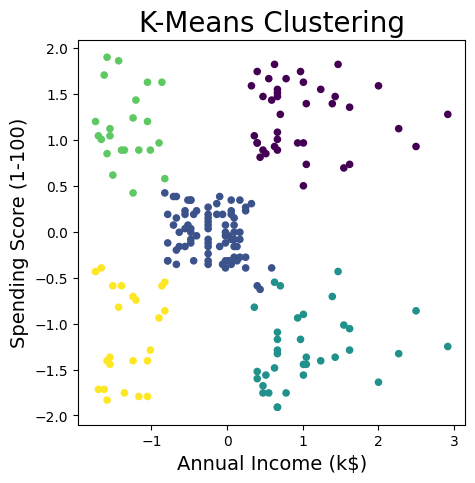

In [40]:
# K-Menas 클러스터링 결과를 나타내는 라벨 추가
df['KMeans_labels']=k_means.labels_

# 시각화
plt.figure(figsize=(5,5))
plt.scatter(new_df[0], new_df[1],c=df['KMeans_labels'], s = 20)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('Annual Income (k$)',fontsize=14)
plt.ylabel('Spending Score (1-100)',fontsize=14)
plt.show()

앞서 데이터 시각화 부분에서 군집 수 5개로 지정했을 때, 적절할 것 같다고 했었는데, 예상했던대로 군집화가 잘 이뤄진 것을 확인할 수 있다.

## Hierarchical Clustering

* 개체들을 가까운 집단부터 차근차근 묶어나가는 방식
* 클러스터 수를 미리 정해주지 않아도 됨

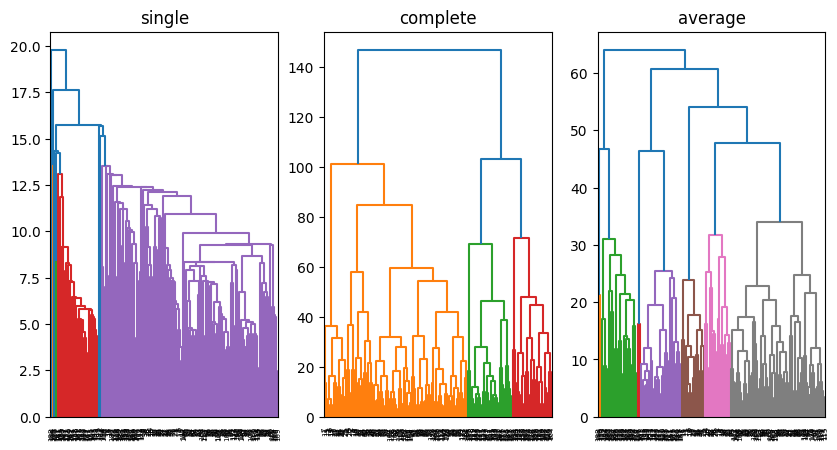

In [41]:
# scipy를 이용한 덴드로그램
from scipy.cluster.hierarchy import linkage, dendrogram

# linkage 총 3개로 지정(거리 계산 파라미터)
linkage_list = ['single', 'complete', 'average']

fig, axes = plt.subplots(nrows= 1, ncols= 3, figsize = (10,5))

# 덴드로그램 그리기
for i in range (len(linkage_list)) :
    Z = linkage(df, method=linkage_list[i])
    den = dendrogram(Z, ax=axes[i])
    axes[i].title.set_text(linkage_list[i])
plt.show()



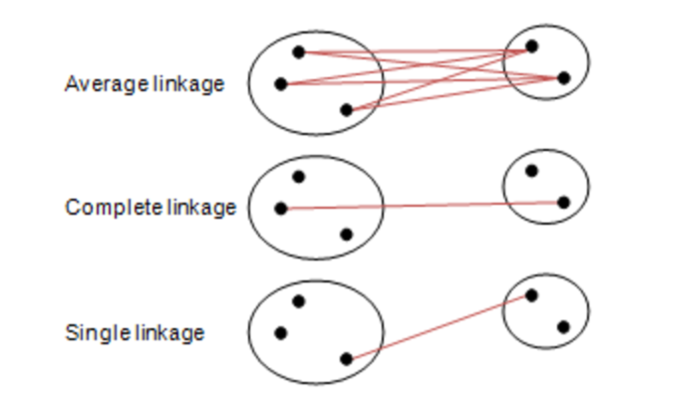

출처 : https://www.multid.se/genex/onlinehelp/hs515.htm

위의 그래프를 봤을 때, `complete`가 가장 적절하게 군집화가 일어난 것을 확인할 수 있다. 따라서 이를 가지고 분석하고자 한다.

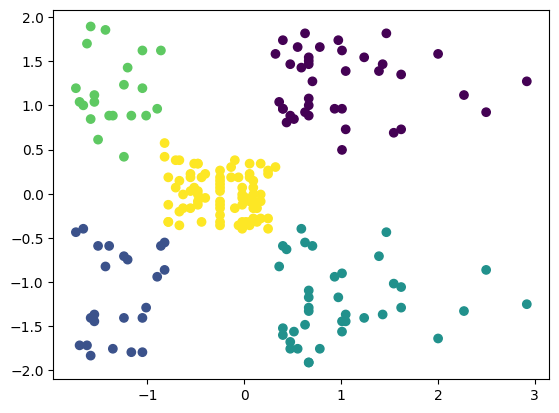

In [44]:
# 병합군집 진행
from sklearn.cluster import AgglomerativeClustering

agg_complete = AgglomerativeClustering(n_clusters = 5, linkage = 'complete')
cluster_pred_2 = agg_complete.fit_predict(new_df)

# 시각화
plt.scatter(new_df[0], new_df[1], c = cluster_pred_2)
plt.show()

군집화가 정교하게 잘 이뤄졌음을 확인할 수 있다.

## 3. Evaluation

* 앞서 clustering 과정에서 Kmeans와 Hierarchical Clustering 두 알고리즘을 이용해서 군집화를 진행했다. <br>

* 군집화된 결과를 비교했을 때 전반적으로 두 알고리즘 모두 알맞게 군집화 된 것을 확인할 수 있었다. <br>

* 하지만 두 알고리즘 중에서 우열을 가려본다면, `Annual Income = 0.5 지점, Spending Score = - 0.5 지점에서 Hierarchical Clustering이 더 세밀하게 군집화가 이뤄졌다고 판단된다.` <br>

* 따라서 본 분석에서는 `Hierarchical Clustering`이 더 나은 기법이라고 말할 수 있다. 그럼에도 두 알고리즘 모두 뛰어나다는 것은 모두가 확인할 수 있다. <br>
* 하지만 본 분석에서는 clustering 기법 중 DBSCAN에 대해서는 다루지 않았기 때문에, DBSCAN과 비교를 할 경우 또 다른 결과가 나타날지도 모른다.